# DS 3000 HW 7
Note: This HW has 90 points total.

Due: Mon April 5 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to gradescope.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run "Kernel > Restart & Run All" just before uploading the `ipynb` file to gradescope.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or post a piazza note if you have a specific question about your work you'd like another pair of eyes to talk through.  (Remember, mark your piazza note private if it contains anything which may be considered a solution to the exercise).

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment.  For example, a python trick I find particularly clever (and useful, sometimes):

```python
from collections import defaultdict

def tree(): 
    # https://gist.github.com/hrldcpr/2012250
    return defaultdict(tree)
```

You need not cite the official python documentation or the documentation of any python library which is imported in the template (e.g. matplotlib, numpy, scipy).

**Documentation / style counts for credit**  Please see our course's python style guide, available on canvas, for further information.


# What contributes to property prices in the Boston area?

We're going to analyze a dataset that contains nearly 1000 different condos and houses currently available for sale in the Boston area. Based on the features of a place and it's location we will try to predict its price.

In [2]:
import pandas as pd

df_pro = pd.read_csv('boston_houses.csv', index_col=None)

df_pro.head()

,beds,baths,area,distance,price,price_bucket
0,3.0,2.0,2584.0,18.726140,1100000.0,price >= 900k
1,1.0,1.0,650.0,1.053808,699000.0,600k <= price < 900k
2,2.0,3.0,1794.0,0.471038,1750000.0,price >= 900k
3,4.0,3.0,1831.0,3.611435,979000.0,price >= 900k
4,3.0,3.0,1875.0,2.200608,1875000.0,price >= 900k


We will try to predict `price`.  To do so, we'll examine:
- number of bedrooms: `beds`
- number of bathrooms: `baths`
- area in sq feet: `area`
- distance in km from the Boston Common: `distance`

We will use the following ML models:
- Decision Trees
- Random Forests
- Regression

And interpret their parameters (Feature Importances in Random Forests & Coefficients in Regression) to try to understand which features are helpful in predicting price.  

## Redlining
[Redlining](https://en.wikipedia.org/wiki/Redlining) has been a significant driver of economic racism driving [a dramatic wealth disparity between Black and white families](https://apps.bostonglobe.com/spotlight/boston-racism-image-reality/series/image/).  

Regression is a powerful tool which can be used to measure the severity of the problem of racist housing practices by including race as an input feature in predicting housing costs.  By measuring a problem we can understand and combat it.  However, it can also be used to perpetuate the problem by naively propogating the biases of the input dataset into decision making.  (Its alarming that the same mathematics can be so helpful and harmful to people depending on how it is used!).

Though we tried to find a suitable example, this homework avoids the issue entirely by excluding race from the analysis.  We couldn't find a way of measuring feature importance in a regression analysis which doesn't conflate correlated features.  (Larger homes have more bedrooms, each is assigned a coefficient in the model and its mathematically challenging to distinguish among the impact of each.  There is another issue as well, please see the final HW question / extra credit).

As we discussed on day 1 of the class, there is a lot of information "lost-in-translation" between the application experts and technical experts as you collaborate on any Data Science project.  On issues of ethics, such as ensuring a tool doesn't encourage racism, us technical experts should make every effort to educate ourselves on the potential impact of our work:
 - [This NPR video](https://youtu.be/O5FBJyqfoLM?t=22) offers a good summary of the history of redlining and its current consequences
 - [This article](https://www.nytimes.com/2021/03/20/opinion/home-value-race-taxes.html) takes on the house valuations and race more explicitly. 
 - ["The Color of Law"](https://shop.harvard.com/book/9781631494536) by Richard Rothstein

## Imports
You're welcome to use others but our solution file completed this assignment using the following:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score
from sklearn.linear_model import LinearRegression

## Part 1: Decision Tree (20 points)
Decision Trees and Random Forests Classifiers, by virtue of being classifiers, estimate a categorical variable.  Our target variable is `price`, which we can approximate by binning, as has been done in `price_bucket`:

In [20]:
df_pro['price_bucket'].unique()

array(['price >= 900k', '600k <= price < 900k', 'price < 600k'],
      dtype=object)

1. Build a Decision Tree with `max_depth=2` which estimates the `price_bucket` of housing using 
    - beds
    - baths
    - area
    - distance
1. Plot the tree using `plot_tree()`.  To help the visualize be easily understood:
    - initialize a figure before calling `plot_tree()` which is `(12, 5)` inches
        - see class notes for example of this syntax
    - utlize the `class_names` input to `plot_tree()` which shows the most common class among the `values` shown
1. While not a rigorous assessment just yet (see parts below), which input features seems to be most helpful in predicting `price_bucket`?  Justify your response by citing specific structures in the tree you've plotted above.
    - Remember, [left = yes](https://piazza.com/class/kjzwrutpcgn2hv?cid=416) in the tree
    - Please write your response in a markdown cell just below the tree itself


In [5]:
clf = DecisionTreeClassifier(random_state=0, max_depth = 2)
X_train = df_pro[['beds', 'baths', 'area', 'distance']]
Y_train = df_pro['price_bucket']
clf.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

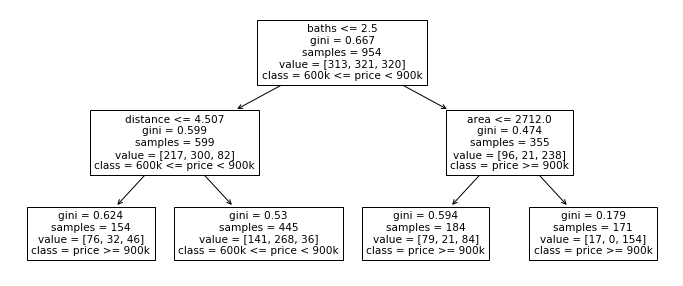

In [12]:
# plot tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,5))
fig = plot_tree(clf, class_names=Y_train, feature_names = X_train.columns)  

### which input features seems to be most helpful in predicting price_bucket? 
#### answer: baths
#### 这里自己回答把，我也不知道咋justify

## Part 2: Random Forest Classification (20 points)
Let us quantify how significant each feature (i.e. 'beds', 'baths', 'area', 'distance') is to create an expensive property via a Random Forest Analysis.  As was done in class, Part 3 will ask us to compute and display the feature importances (Mean Reduction in Gini) of each of the features.  

Of course, **before examining feature importances, we must validate that our Random Forest Classification does classify most of the samples correct**.  (Nobody cares how important each feature is in a classifier which doesn't work).

Using 10 fold cross validation,construct a confusion matrix which shows how well a Random Forest (max_depth=3) classifies this data.  Use the same x, y definitions as above.

In [21]:
from sklearn.model_selection import cross_val_predict, cross_val_score
skf = StratifiedKFold(n_splits=10)
model = RandomForestClassifier(max_depth=3)
y_pred = cross_val_predict(model, X_train, Y_train, cv = skf)
confusion_matrix(Y_train, y_pred)  # 我直接用了cross_val_predict， 没有写传统的cross_val

array([[176,  96,  41],
       [ 63, 253,   5],
       [ 72,  10, 238]])

## Part 3 Feature Importance in Random Forest (16 points)
1. Fit a Random Forest Classifier on the *entire dataset.  
1. Plot the Feature Importances, mean reduction in Gini scores, via `plot_feat_import()`.
1. Write 1 or 2 sentences which are easily understood by a non-technical reader which synthesize the key takeaway message of the plot. Make sure you remind the reader what `price_bucket` means
    - write your response in a markdown cell below the plot itself please

*without k-fold Cross Validation ... remember that doing so yields k distinct classifiers which likely have slightly different feature importances.  By training on the entire dataset we implicitly "average" across the whole dataset.

In [22]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(% decrease in Gini due to each feature)')

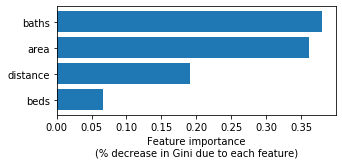

In [23]:
model = RandomForestClassifier(max_depth=3)
model.fit(X_train, Y_train)
model.feature_importances_
plot_feat_import(X_train.columns, model.feature_importances_)

# Part 4: Regression (14 points)
One uncomfortable fact about the analysis above is that it bins price into three coarse price groups.  This was done because our methods were classifiers which require some categorical output.  This is uncomfortable because there is a lot of information lost in binning the properties into unordered, coarse groups based on `price`.  (We would have avoided it altogether if we didn't need to practice the skills on HW  ... the work above is still valid its just not as informative as it could be).

To properly predict $y=$`price` and measure the impact of:

- $x_1 = $ beds
- $x_2 = $ baths
- $x_3 = $ area
- $x_4 = $ distance

1. Fit a regression model of the form:
    $$ a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + a_4 x_4 = \hat{y}$$
    which minimizes the Mean of Squared Errors.
1. Compute the $R^2$ score associated with your regression model and explain, in a markdown cell, its significance to a non-technical reader.

In [32]:
import statsmodels.api as sm
lr = LinearRegression()
X_train_new = sm.add_constant(X_train)
Y_train_new =  df_pro['price']
lr.fit(X_train_new, Y_train_new)
y_pro = lr.predict(X_train_new)
print (r2_score(y_pro, Y_train_new))# 检查一下，感觉好小啊
print (lr.coef_)

0.1272668581755736
[      0.         -149261.71101846  153301.32748012     511.19321839
  -41743.00249623]


/opt/anaconda3/envs/python37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Part 5: Interpretting coefficients in a Regression Model (20 points)
The coefficients of the regression model above are:
```python
from pprint import pprint

feat_coef_dict = dict(zip(x_feat_list, reg.coef_))

pprint(feat_coef_dict)
```

     {'area': 511.1932183931931,
     'baths': 153301.32748013045,
     'beds': -149261.71101844066,
     'distance': -41743.00249623357}
     
1. Explain, to a non-technical reader, the meaning of each coefficient.  Use the notes on interpretting slope as a guide.  (I know doing this four times is a bit redundant, but it helps inform us on the question below)  
1. Note that the coefficient of `beds` is negative. Is that what you would expect? What could be the explanation?
    - **hint**: Re-train your model with only `baths`, `beds`, `distance`, without `area`. Is the coefficient of `beds` still negative? What does that mean and how does this affect our interpretation of the negative coefficient in the full model? (no need to include the code, just the answer)
1. Naively, one might assume that the coefficients themselves are appropriate approximations of feature importance.  How might you correct somebody who claims, "Because `baths` has the biggest coefficient it must be the most important feature to determine the price".  Please be clear, specific and brief.

In [ ]:
# 解释自己来吧

## Part 6 Feature Importance in a Regression Model (+5 points)

How might you fix the error in Part 5.2 so that one could interpret the magnitude of regression coefficients as feature importance?  Implement your solution and synthesize the analysis so a non technical reader could easily understand.

Note: This problem is entirely extra credit, you need not submit for full marks on this HW.

Feature: 0, Score: 0.00000
Feature: 1, Score: -149261.71102
Feature: 2, Score: 153301.32748
Feature: 3, Score: 511.19322
Feature: 4, Score: -41743.00250


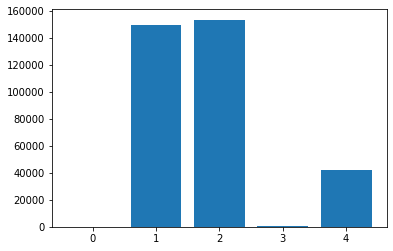

In [37]:
# get importance
import math
importance = lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], abs(importance))
plt.show()